<a href="https://colab.research.google.com/github/tariqshaban/covid-19-vaccination/blob/master/COVID%2019%20Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
# Enabling colored terminal text for warnings
!pip install colorama

import plotly.graph_objects as go
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output
from datetime import datetime, timedelta
from colorama import Fore, Back, Style

plt.rcParams["figure.figsize"] = (10, 9)
clear_output()
print(Fore.GREEN + u'\u2713 ' + 'Successfully downloaded dependencies.')    
print(Style.RESET_ALL)

✓ Successfully downloaded dependencies.



# Reading Dataset

In [2]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Explore dataframe dimensionality
print('No. of columns ' + str(len(df.columns)))
print('No. of rows ' + str(len(df.index)))

# Explore columns
print('\nColumns')
print('-----------------------------------------------------------------------')
print(*df.columns, sep='\n')

No. of columns 67
No. of rows 185679

Columns
-----------------------------------------------------------------------
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_

# Preprocessing

In [3]:
# Remove unnecessary columns
df = df[[
    'iso_code', 'continent', 'location', 'date',
    'population', 'population_density', 'median_age', 'extreme_poverty', 'diabetes_prevalence',
    'total_cases', 'new_cases', 'total_cases_per_million', 'new_cases_per_million',
    'total_deaths', 'new_deaths', 'total_deaths_per_million', 'new_deaths_per_million',
    'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
    'total_tests', 'total_tests_per_thousand', 'new_tests', 'new_tests_per_thousand',
    'people_vaccinated', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
    'total_boosters', 'total_boosters_per_hundred'
]]

# Find columns nulls percentage
print('Null percentage in each column before vaccination distribution')
print('-----------------------------------------------------------------------')
print(df.isnull().sum() / df.shape[0] * 100.00)

# Worldwide statistics is concerned rather than a specific stratum
df_world = df[df['location'] == 'World']

# Date when vaccination was first administered
df_vaccine_world = df_world[df_world['date'] >= '2020-12-02'].copy()

# Find columns nulls percentage
print('\nNull percentage in each column after vaccination distribution')
print('-----------------------------------------------------------------------')
print(df_vaccine_world.isnull().sum() / df_vaccine_world.shape[0] * 100.00)

# Remove columns that have a high percentage of nulls
df_vaccine_world.drop([
    'continent',
    'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
    'total_tests', 'total_tests_per_thousand', 'new_tests', 'new_tests_per_thousand'
], axis=1, inplace=True)

# Vaccination dataframe dimensionality
print('\nNo. of columns ' + str(len(df_vaccine_world.columns)))
print('No. of rows ' + str(len(df_vaccine_world.index)))

Null percentage in each column before vaccination distribution
-----------------------------------------------------------------------
iso_code                                0.000000
continent                               5.838032
location                                0.000000
date                                    0.000000
population                              0.615578
population_density                     10.918844
median_age                             17.439775
extreme_poverty                        46.210934
diabetes_prevalence                    13.588505
total_cases                             3.706397
new_cases                               3.809262
total_cases_per_million                 4.151250
new_cases_per_million                   4.254116
total_deaths                           13.579349
new_deaths                             13.572887
total_deaths_per_million               14.017202
new_deaths_per_million                 14.010739
icu_patients                    

# Daily New Cases

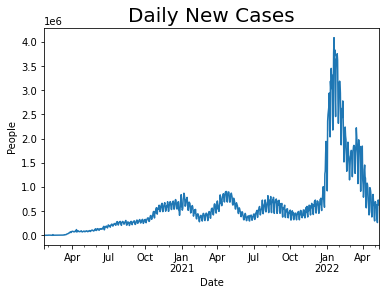

In [4]:
df_plot = df_world[['date', 'new_cases']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line', legend=None)

plt.xlabel('Date')
plt.ylabel('People')
plt.title('Daily New Cases', fontsize=20)

plt.show()

# Daily New Deaths

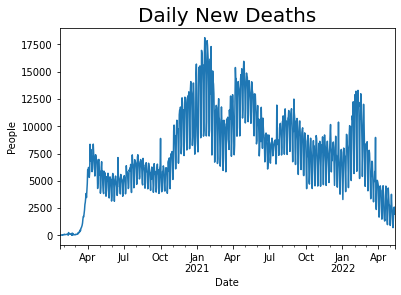

In [5]:
df_plot = df_world[['date', 'new_deaths']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line', legend=None)

plt.xlabel('Date')
plt.ylabel('People')
plt.title('Daily New Deaths', fontsize=20)

plt.show()

# Cumulative Vaccination

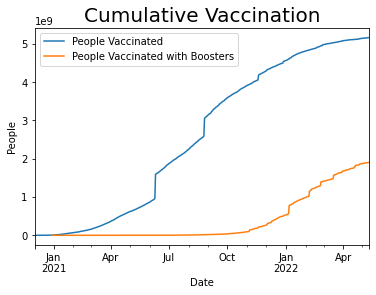

In [6]:
df_plot = df_vaccine_world[['date', 'people_vaccinated', 'total_boosters']]
df_plot.set_index('date', inplace=True)
df_plot.plot(kind='line')

plt.legend(['People Vaccinated', 'People Vaccinated with Boosters'])
plt.xlabel('Date')
plt.ylabel('People')
plt.title('Cumulative Vaccination', fontsize=20)

plt.show()

# New Cases Yesterday

In [7]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['new_cases'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'New Cases in {yesterday}',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()

# New Deaths Yesterday

In [8]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['new_deaths'],
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title=f'New Deaths in {yesterday}',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()

# Infection Probability

In [9]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_cases'] / df_yesterday['population'] * 100,
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title='Infection Probability (per Hundred)',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()

# Death Probability

In [10]:
yesterday = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
df_yesterday = df[df['date']==yesterday]
df_yesterday = df_yesterday[df_yesterday['iso_code'].notna() & df_yesterday['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_yesterday['iso_code'],
    z = df_yesterday['total_deaths'] / df_yesterday['population'] * 100,
    text = df_yesterday['location'],
    colorscale='Reds',
))

fig.update_layout(
    title='Death Probability (per Hundred)',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()

# Average Vaccinaions per Hundred During April and May

In [11]:
df_may = df[(df['date']>='2022-04-01') & (df['date']<='2022-05-31')]
df_may = df_may[df_may['iso_code'].notna() & df_may['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_may['iso_code'],
    z = df_may['people_vaccinated_per_hundred'],
    text = df_may['location'],
    colorscale='Greens',
))

fig.update_layout(
    title='Average Vaccinaions per Hundred During April and May',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()

# Average Fully Vaccinaions per Hundred During April and May

In [12]:
df_may = df[(df['date']>='2022-04-01') & (df['date']<='2022-05-31')]
df_may = df_may[df_may['iso_code'].notna() & df_may['continent'].notna()]


fig = go.Figure(data=go.Choropleth(
    locations = df_may['iso_code'],
    z = df_may['people_fully_vaccinated_per_hundred'],
    text = df_may['location'],
    colorscale='Greens',
))

fig.update_layout(
    title='Average Fully Vaccinaions per Hundred During April and May',
    autosize=True,
    margin=dict(t=40, b=5, l=0, r=0)
)

fig.show()